In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 1. Cargar el dataset
df = sns.load_dataset("titanic")


In [ ]:
display(df)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [ ]:
# 2. EDA: Inspección inicial
df.info()
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    object  
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(4)
memory usage: 65.5+ KB
         survived      pclass       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642    0.523008    0.381594   32.204208
std      0.486592    0.8

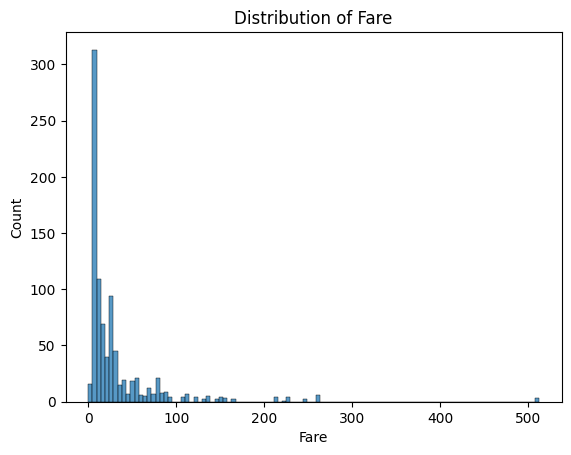

In [ ]:
# Histograma de 'fare'
sns.histplot(data=df, x='fare')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

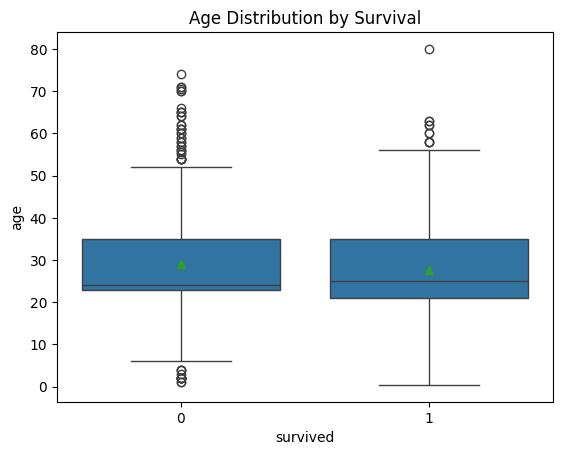

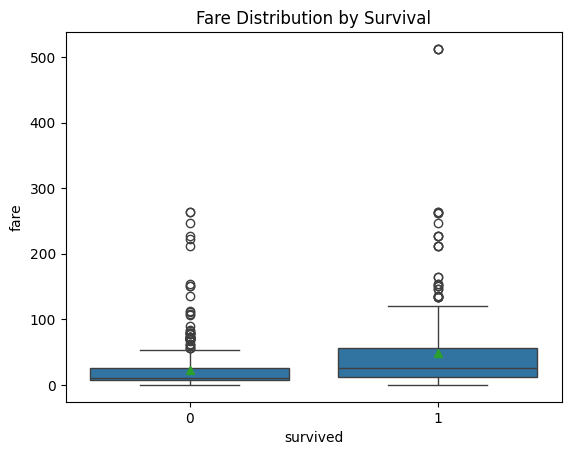

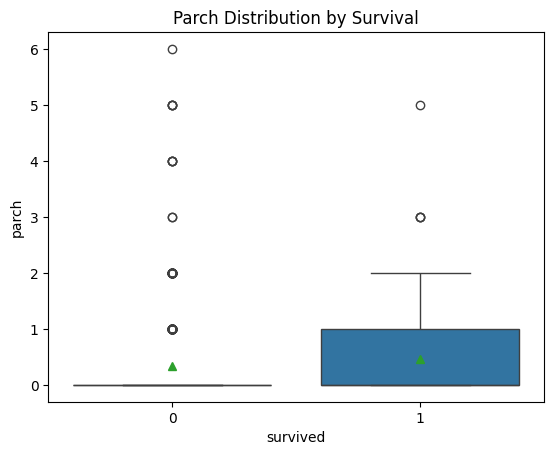

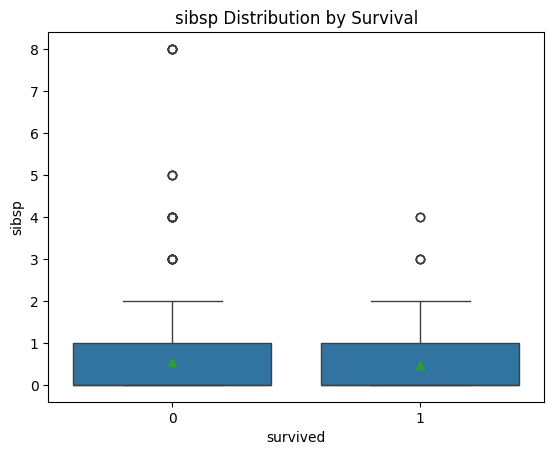

In [ ]:
## un pequeño analisis descriptivo bidi
import seaborn as sns
import matplotlib.pyplot as plt


# Boxplot de 'age' con medias
sns.boxplot(x='survived', y='age', data=df, showmeans=True)
plt.title('Age Distribution by Survival')
plt.show()

# Boxplot de 'fare' con medias
sns.boxplot(x='survived', y='fare', data=df, showmeans=True)
plt.title('Fare Distribution by Survival')
plt.show()

# Boxplot de 'age' con medias
sns.boxplot(x='survived', y='parch', data=df, showmeans=True)
plt.title('Parch Distribution by Survival')
plt.show()

# Boxplot de 'fare' con medias
sns.boxplot(x='survived', y='sibsp', data=df, showmeans=True)
plt.title('sibsp Distribution by Survival')
plt.show()



In [ ]:
import pandas as pd

# Crear la matriz de contingencia
contingency_matrix = pd.crosstab(df['parch'], df['survived'])

# Mostrar la matriz
print(contingency_matrix)

survived    0    1
parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0


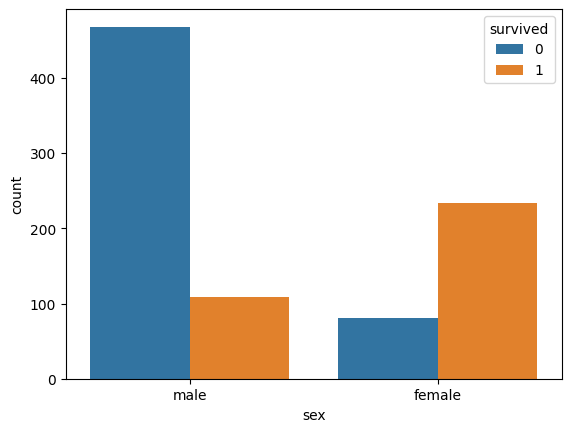

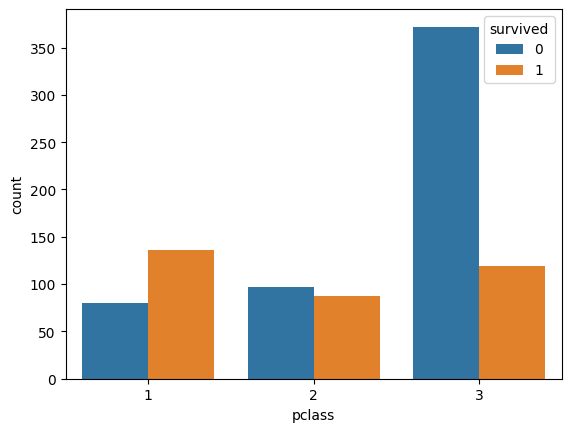

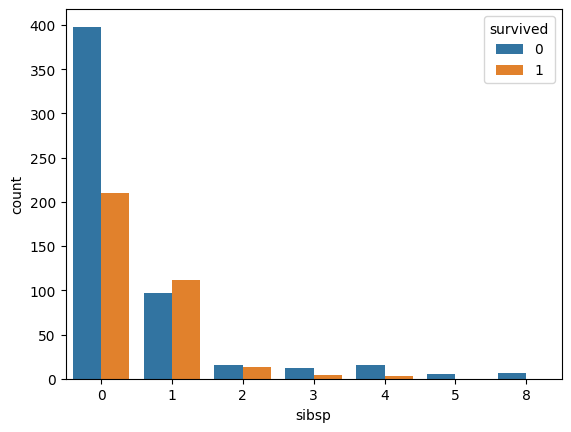

In [ ]:
sns.countplot(x='sex', hue='survived', data=df)
plt.show()

sns.countplot(x='pclass', hue='survived', data=df)
plt.show()

sns.countplot(x='sibsp', hue='survived', data=df)
plt.show()

In [ ]:

# a. Análisis de valores perdidos
print(df.isnull().sum())  # Mostrar la cantidad de valores perdidos por columna


survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64


In [ ]:
print(df.columns)
# 4. Feature Engineering:

# a. Variables numéricas y categóricas
num_features = ['age', 'fare', 'sibsp', 'parch']
cat_features = ['sex', 'class', 'embarked', 'who', 'alone']

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])



display(df)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alone'],
      dtype='object')


survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female  24.0      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male  alone  
0      man        True  False  
1    woman       False  False  
2    woman       False   True  
3    woman       False  False  
4      man        True   True  
..     ...         ...    ...  
886    man        True   True  
887  woman       False   True  
888  woman       False  False  
889    man        True   True  
890    man        True   True  

[891 rows x 12 columns]

from matplotlib import pyplot as plt
df['survived'].plot(kind='hist', bins=20, title='survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['pclass'].plot(kind='hist', bins=20, title='pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['sibsp'].plot(kind='hist', bins=20, title='sibsp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('who').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('adult_male').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='survived', y='pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='pclass', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='age', y='sibsp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sibsp', y='parch', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['survived'].plot(kind='line', figsize=(8, 4), title='survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['pclass'].plot(kind='line', figsize=(8, 4), title='pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['sibsp'].plot(kind='line', figsize=(8, 4), title='sibsp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['embarked'].value_counts()
    for x_label, grp in df.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('embarked')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['who'].value_counts()
    for x_label, grp in df.groupby('embarked')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('embarked')
_ = plt.ylabel('who')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['adult_male'].value_counts()
    for x_label, grp in df.groupby('who')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('who')
_ = plt.ylabel('adult_male')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['alone'].value_counts()
    for x_label, grp in df.groupby('adult_male')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('adult_male')
_ = plt.ylabel('alone')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='survived', y='sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['embarked'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='survived', y='embarked', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['who'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='survived', y='who', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['adult_male'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='survived', y='adult_male', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-34-17704b0cb597>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='survived', y='sex', inner='box', palette='Dark2')


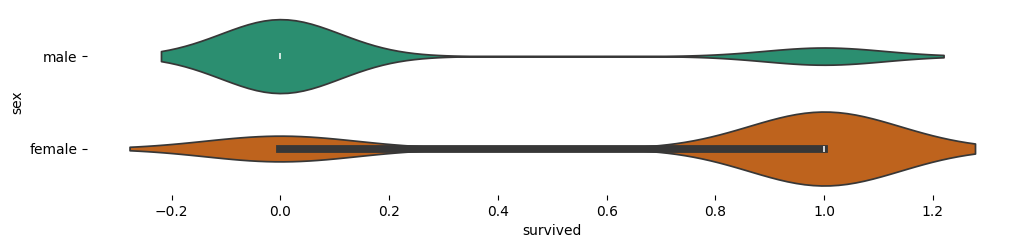

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='survived', y='sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import pandas as pd

# Ajustar y transformar los datos
X_transformed = preprocessor.fit_transform(df)

# Obtener los nombres de las columnas transformadas
num_feature_names = preprocessor.named_transformers_['num'].get_feature_names_out(num_features)
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
feature_names = list(num_feature_names) + list(cat_feature_names)

# Crear un nuevo DataFrame con los datos transformados
df_transformed = pd.DataFrame(X_transformed, columns=feature_names, index=df.index)

# Mostrar el DataFrame transformado
display(df_transformed)

age      fare     sibsp     parch  sex_female  sex_male  \
0   -0.497793 -0.502445  0.432793 -0.473674         0.0       1.0   
1    0.715048  0.786845  0.432793 -0.473674         1.0       0.0   
2   -0.194583 -0.488854 -0.474545 -0.473674         1.0       0.0   
3    0.487640  0.420730  0.432793 -0.473674         1.0       0.0   
4    0.487640 -0.486337 -0.474545 -0.473674         0.0       1.0   
..        ...       ...       ...       ...         ...       ...   
886 -0.118780 -0.386671 -0.474545 -0.473674         0.0       1.0   
887 -0.725201 -0.044381 -0.474545 -0.473674         1.0       0.0   
888 -0.346188 -0.176263  0.432793  2.008933         1.0       0.0   
889 -0.194583 -0.044381 -0.474545 -0.473674         0.0       1.0   
890  0.260233 -0.492378 -0.474545 -0.473674         0.0       1.0   

     class_First  class_Second  class_Third  embarked_C  embarked_Q  \
0            0.0           0.0          1.0         0.0         0.0   
1            1.0           0.0          0.0         1.0         0.0   
2            0.0           0.0          1.0         0.0         0.0   
3            1.0           0.0          0.0         0.0         0.0   
4            0.0           0.0          1.0         0.0         0.0   
..           ...           ...          ...         ...         ...   
886          0.0           1.0          0.0         0.0         0.0   
887          1.0           0.0          0.0         0.0         0.0   
888          0.0           0.0          1.0         0.0         0.0   
889          1.0           0.0          0.0         1.0         0.0   
890          0.0           0.0          1.0         0.0         1.0   

     embarked_S  who_child  who_man  who_woman  alone_False  alone_True  
0           1.0        0.0      1.0        0.0          1.0         0.0  
1           0.0        0.0      0.0        1.0          1.0         0.0  
2           1.0        0.0      0.0        1.0          0.0         1.0  
3           1.0        0.0      0.0        1.0          1.0         0.0  
4           1.0        0.0      1.0        0.0          0.0         1.0  
..          ...        ...      ...        ...          ...         ...  
886         1.0        0.0      1.0        0.0          0.0         1.0  
887         1.0        0.0      0.0        1.0          0.0         1.0  
888         1.0        0.0      0.0        1.0          1.0         0.0  
889         0.0        0.0      1.0        0.0          0.0         1.0  
890         0.0        0.0      1.0        0.0          0.0         1.0  

[891 rows x 17 columns]

In [ ]:
# 5. División en entrenamiento y prueba
X = df.drop(columns=['survived'])
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# 6. Construcción del modelo con un Pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 7. Entrenamiento del modelo
model.fit(X_train, y_train)  # Entrena el pipeline

# a. Predicciones en el conjunto de entrenamiento
y_pred_train = model.predict(X_train)

# b. Predicciones en el conjunto de test
y_pred_test = model.predict(X_test)

# c. Métricas en el conjunto de entrenamiento
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Train Classification Report:\n", classification_report(y_train, y_pred_train))

# d. Métricas en el conjunto de test
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test))


Train Accuracy: 0.9789325842696629
Train Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       444
           1       0.98      0.96      0.97       268

    accuracy                           0.98       712
   macro avg       0.98      0.97      0.98       712
weighted avg       0.98      0.98      0.98       712


Test Accuracy: 0.8156424581005587
Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [3]:
from sklearn.model_selection import train_test_split, KFold

X = df.drop(columns=['survived'])
y = df['survived']

  # Primero, dividir en train + validation y test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   # Luego, dividir train + validation en train y validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2





In [9]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# a. Variables numéricas y categóricas
num_features = ['age', 'fare', 'sibsp', 'parch']
cat_features = ['sex', 'class', 'embarked', 'who', 'alone']

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=80, random_state=42))
])



for fold, (train_index, val_index) in enumerate(kf.split(X_train_val)):
       print(f"Fold {fold + 1}")
       X_train_fold = X_train_val.iloc[train_index]
       X_val_fold = X_train_val.iloc[val_index]
       y_train_fold = y_train_val.iloc[train_index]
       y_val_fold = y_train_val.iloc[val_index]

       # Entrenar el modelo con los datos del fold actual
       model.fit(X_train_fold, y_train_fold)

       # Evaluar en el conjunto de validación del fold
       y_pred_val = model.predict(X_val_fold)
       print("Validation Accuracy:", accuracy_score(y_val_fold, y_pred_val))
       print("Validation Classification Report:\n", classification_report(y_val_fold, y_pred_val))

Fold 1
Validation Accuracy: 0.8111888111888111
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84        87
           1       0.75      0.77      0.76        56

    accuracy                           0.81       143
   macro avg       0.80      0.80      0.80       143
weighted avg       0.81      0.81      0.81       143

Fold 2
Validation Accuracy: 0.7552447552447552
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81        90
           1       0.68      0.64      0.66        53

    accuracy                           0.76       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.76      0.75       143

Fold 3
Validation Accuracy: 0.7816901408450704
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81  

In [15]:
from sklearn.model_selection import cross_val_score, cross_validate

# 5. División en entrenamiento y prueba
X = df.drop(columns=['survived'])
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# a. Variables numéricas y categóricas
num_features = ['age', 'fare', 'sibsp', 'parch']
cat_features = ['sex', 'class', 'embarked', 'who', 'alone']

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=80, random_state=42))
])

# Ajustar el pipeline a todos los datos de entrenamiento para obtener feature_names
model.fit(X_train_val, y_train_val)


scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())



Cross-validation scores: [0.7972028  0.75524476 0.8028169  0.77464789 0.81690141]
Mean accuracy: 0.7893627499261303


In [16]:
# b. Predicciones en el conjunto de test
y_pred_test = model.predict(X_test)

# d. Métricas en el conjunto de test
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test))


Test Accuracy: 0.8212290502793296
Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

